### Load MNIST Data


> from kaggle: https://www.kaggle.com/competitions/digit-recognizer/data 

> download train.csv file and rename as mnist_train.csv


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('./mnist_train.csv')
# print(df.head(5)) # print the first five rows



In [4]:
label = df['label'] # save the lable into different df
data = df.drop("label",axis = 1)

In [5]:
print(label.shape) # only one column in label
print(data.shape) # data size(row * column)


(42000,)
(42000, 784)


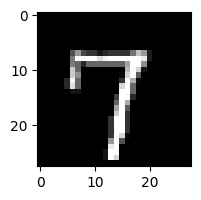

data Label :  7


In [6]:
# display or plot a number
plt.figure(figsize=(2,2))
row_index = 6

# reshape from 1-D to 2-D
grid_data = data.iloc[row_index].to_numpy().reshape(28,28) 

plt.imshow(grid_data,cmap = "gray")
plt.show()
print("data Label : ",label[row_index])


#### 2D Visualization using PCA

In [7]:
# pick first 15K data-points to work on for fast processing
# Homework : perform same analysis on all 42K data-points

label = df["label"].head(15000)
data = df.drop("label",axis=1).head(15000)
print("shape of sample data : ",data.shape)

shape of sample data :  (15000, 784)


In [8]:
# data pre-processing : Standardizing the data : z[i] = (x[i]-mean)/sigma , for all i =[1,n]
# now z[i] have mean = 0 and varinace  = [-1,1] 
# ref  : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
standardized_data =  StandardScaler().fit_transform(data)  
print(standardized_data,"\n\n size =",standardized_data.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

 size = (15000, 784)


In [9]:
# computing  co-varinace matrix (X^T * X)for data
covar_matrix = np.matmul(standardized_data.T , standardized_data)
print("co-varinace matrix size = ",covar_matrix.shape) 

co-varinace matrix size =  (784, 784)


In [10]:
# finding the top two eigne-value and corresponding eigen-vectors
# projectign onto  2-D space

from  scipy.linalg import eigh
value,vectors = eigh(covar_matrix,subset_by_index=(782,783))
print("Shape of top 2 Eigen-Vectors = ",vectors.shape)

vectors = vectors.T  # doing transpose for easy computation
print("Updated Shape of Eigen-Vectors = ",vectors.shape)


Shape of top 2 Eigen-Vectors =  (784, 2)
Updated Shape of Eigen-Vectors =  (2, 784)


            eigh() : return eigen-value in ascending order 
            this parameter  : subset_by_index(low_value, high_value) to choose eigne-value & eigen-vectors
            linalg : Linear Algebra
            eigh : eigen-value h



In [11]:
# Projecting the original data sample on the plane formed by 
# tow principle eigen_vectors by Vector-Vector Multiplication

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, standardized_data.T)
print("Resultant new data points shape : ",vectors.shape,'x',standardized_data.T.shape,  "= ", new_coordinates.shape)

# appending label to the 2D projected data
print(label.shape,new_coordinates.shape)

new_coordinates = np.vstack((label,new_coordinates)).T
print("after adding label column to data set : ",new_coordinates.shape)
# vstack is vertical stack to add into dataframe

# creating new dataframe for plotting the labeled points
dataframe = pd.DataFrame(data = new_coordinates,columns=("1st_principle","2nd_principle","label"))
dataframe.head()

Resultant new data points shape :  (2, 784) x (784, 15000) =  (2, 15000)
(15000,) (2, 15000)
after adding label column to data set :  (15000, 3)


,1st_principle,2nd_principle,label
0,1.0,-5.558661,-5.043558
1,0.0,6.193635,19.305278
2,1.0,-1.909878,-7.678775
3,4.0,5.525748,-0.464845
4,0.0,6.366527,26.644289


In [12]:
# plot this data with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue="label", height=2).map(plt.scatter, '1st_principle', '2nd_principle').add_legend()
plt.show() 
 

PCA is not very useful to visulalization data , it project the data points in same region , so differentiating data points
of different label is difficult.


- ### <ins>PCA Using Scikit-Learn

Shape of pca_reduced.shape =  (15000, 2)
Shape of pca_data after adding label =  (15000, 3)


/home/ranjan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


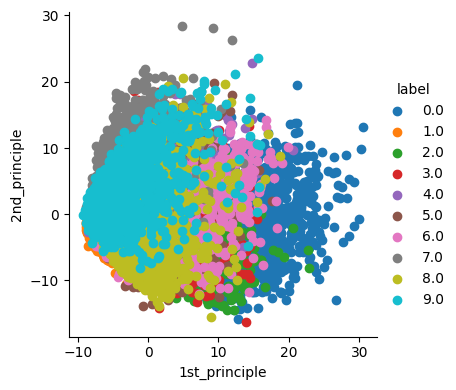

In [13]:
from sklearn import decomposition
pca = decomposition.PCA()         # initializing the PCA

pca.n_components = 2            # Number of principle components

pca_data = pca.fit_transform(standardized_data)
print("Shape of pca_reduced.shape = ",pca_data.shape)

pca_data = np.vstack((pca_data.T,label)).T          # adding label for each 2-D points
print("Shape of pca_data after adding label = ",pca_data.shape)


# creating a new dataframe which will help us to plotting the result data

pca_df = pd.DataFrame(data = pca_data,columns=("1st_principle","2nd_principle","label"))

import seaborn as sns
sns.FacetGrid(pca_df, hue = "label", height = 4).map(plt.scatter,'1st_principle','2nd_principle').add_legend()



<Axes: xlabel='1st_principle', ylabel='2nd_principle'>

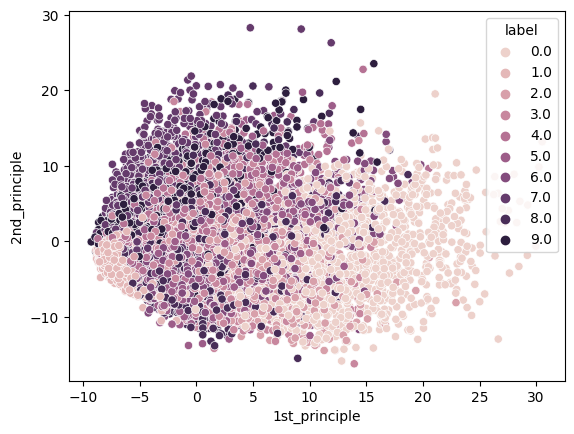

In [14]:
sns.scatterplot(x="1st_principle",y="2nd_principle",legend="full",hue="label",data=pca_df)

- ### <ins>PCA for dimensionality Reduction (Not for Visualization)

In [15]:
from sklearn import decomposition
pca = decomposition.PCA()         # initializing the PCA

pca.n_components = 784            # computing for all components

pca_data = pca.fit_transform(standardized_data)

# [lambda(i)/sum of all lambda(i)] , for all i = [1,784] 
precentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

# sum of lambda(i)'s 
cum_var_explained = np.cumsum(precentage_var_explained)

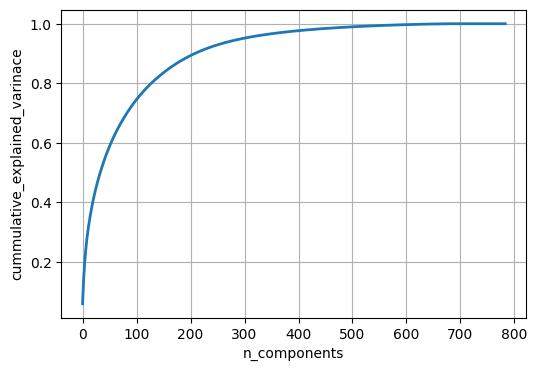

In [16]:
# plot the PCA spectrum
plt.figure(1,figsize=(6,4))
plt.clf()

plt.plot(cum_var_explained,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cummulative_explained_varinace')
plt.show()

observation :  

            if we plot 784 dimension to 200 dimension , then we can explained 90% information 
            of 784- dimension into 200 dimension